In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Load the data
file_path = 'aia.us.csv'  # File path
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

In [106]:
# preprocessing

# calculate Simple Return (Close - Open) feature
df['Simple_Return'] = (df['Close'] - df['Open'])/df['Open']

# calculate Log Return feature Using Close price
# Log Return = ln(Close_t / Close_t-1) * 100
df['Log_Return%'] = np.log(df['Close'] / df['Close'].shift(1)) * 100

# drop the OpenInt feature
df = df.drop('OpenInt', axis=1)

# detect missing data, and replace all empty spaces or null values with NaN
df = df.fillna(value=np.nan)

In [107]:
# Calculate Moving Average for Close Price (e.g., over a 5-day window) #可以改
window_size = 5
df['Simple_Moving_Average (SMA)'] = df['Close'].rolling(window=window_size).mean()

# Label
df['label'] = (df['Log_Return%'] > 0).astype(int)

# remove the first four rows (they contains NaN values because of the feature calculation, so remove)
df = df.iloc[4:]

df

,Date,Open,High,Low,Close,Volume,Simple_Return,Log_Return%,Simple_Moving_Average (SMA),label
4,2007-11-26,41.282,41.612,40.5940,40.594,8492,-0.016666,1.301730,41.27640,1
5,2007-11-27,40.594,41.420,40.5940,41.343,8377,0.018451,1.828285,40.93480,1
6,2007-11-28,42.310,42.946,42.1190,42.946,18246,0.015032,3.804039,41.37580,1
7,2007-11-29,43.189,43.591,42.6940,43.478,20425,0.006692,1.231155,41.68600,1
8,2007-11-30,43.973,44.184,43.0170,43.017,10787,-0.021741,-1.065968,42.27560,0
...,...,...,...,...,...,...,...,...,...,...
2508,2017-11-06,65.600,65.779,65.5200,65.700,55570,0.001524,0.457667,65.36518,1
2509,2017-11-07,65.990,66.090,65.6982,65.830,27197,-0.002425,0.197674,65.59518,1
2510,2017-11-08,66.040,66.180,65.9300,66.150,80855,0.001666,0.484923,65.72918,1
2511,2017-11-09,65.760,65.795,65.3090,65.680,42063,-0.001217,-0.713043,65.75200,0


In [108]:
# feature extraction for "Date" column

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, Day of Month, and Day of Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Month'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.weekday

# calculate cosine and sine values of Day_of_Week to preserve the relation between days
df['Day_of_Week_sin'] = np.sin(df['Day_of_Week'] * (2 * np.pi / 7))
df['Day_of_Week_cos'] = np.cos(df['Day_of_Week'] * (2 * np.pi / 7))

# convert the day of week in to weekdays and weekend feature
# df["is_weekend"] = df["Day_of_Week"].apply(is_weekend)

# convert the year column to elapsed time from the first year (or use it to group data?)
df["Year"] = df["Year"] - 2007

df

,Date,Open,High,Low,Close,Volume,Simple_Return,Log_Return%,Simple_Moving_Average (SMA),label,Year,Month,Day_of_Month,Day_of_Week,Day_of_Week_sin,Day_of_Week_cos
4,2007-11-26,41.282,41.612,40.5940,40.594,8492,-0.016666,1.301730,41.27640,1,0,11,26,0,0.000000,1.000000
5,2007-11-27,40.594,41.420,40.5940,41.343,8377,0.018451,1.828285,40.93480,1,0,11,27,1,0.781831,0.623490
6,2007-11-28,42.310,42.946,42.1190,42.946,18246,0.015032,3.804039,41.37580,1,0,11,28,2,0.974928,-0.222521
7,2007-11-29,43.189,43.591,42.6940,43.478,20425,0.006692,1.231155,41.68600,1,0,11,29,3,0.433884,-0.900969
8,2007-11-30,43.973,44.184,43.0170,43.017,10787,-0.021741,-1.065968,42.27560,0,0,11,30,4,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2017-11-06,65.600,65.779,65.5200,65.700,55570,0.001524,0.457667,65.36518,1,10,11,6,0,0.000000,1.000000
2509,2017-11-07,65.990,66.090,65.6982,65.830,27197,-0.002425,0.197674,65.59518,1,10,11,7,1,0.781831,0.623490
2510,2017-11-08,66.040,66.180,65.9300,66.150,80855,0.001666,0.484923,65.72918,1,10,11,8,2,0.974928,-0.222521
2511,2017-11-09,65.760,65.795,65.3090,65.680,42063,-0.001217,-0.713043,65.75200,0,10,11,9,3,0.433884,-0.900969


In [96]:
def is_weekend(day):
    return 1 if day in [5, 6] else 0

In [109]:
# analyze outliers

# plot box plots
# box_plots = df.boxplot(column=["Open", "High", "Low", "Close", "Simple_Return", "Log_Return%", "Simple_Moving_Average (SMA)"])
# box_plots = df.boxplot(column=["Year", "Month", "Day_of_Month", "Day_of_Week", "Day_of_Week_sin", "Day_of_Week_cos"])
# box_plots = df.boxplot(column="Volume")

# remove datapoints that has Volumn >= 150000
df = df[df["Volume"] < 150000]


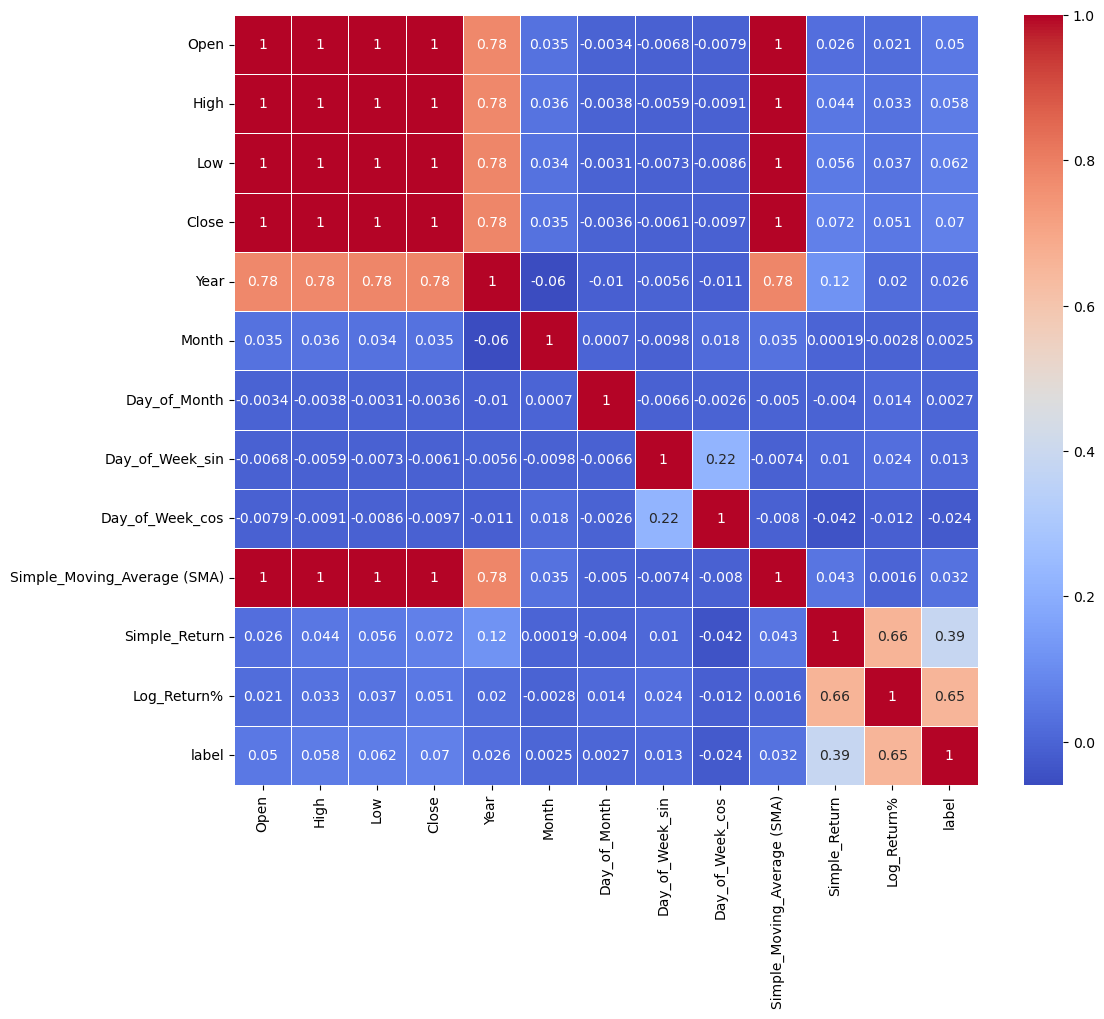

In [111]:
# select features
df = df[["Open", "High", "Low", "Close", "Year", "Month", "Day_of_Month", "Day_of_Week_sin", "Day_of_Week_cos", "Simple_Moving_Average (SMA)", "Simple_Return", "Log_Return%", "label"]]
corr_maxtrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_maxtrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [104]:
# Split Dataset randomly, 70% for training, and 30% for testing
X = df.drop('label', axis = 1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=334)

# normalize the data using standard scalar
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# Save the train and test sets to files
pd.DataFrame(x_train, columns=X.columns).to_csv('xTrain.csv', index=False)
pd.DataFrame(x_test, columns=X.columns).to_csv('xTest.csv', index=False)
y_train.to_csv('yTrain.csv', index=False)
y_test.to_csv('yTest.csv', index=False)